In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### text
대게는 데이터의 위치에 따라 text를 배치할거지만

때로는 데이터와 상관없이 text 넣고 싶을때도 있다

(0.0, 10.0, 0.0, 10.0)

Text(1, 5, 'Data(1,5)')

Text(0.5, 0.1, 'Axes(0.2,0.45)')

Text(0.2, 0.2, 'Figure(0.2,0.45)')

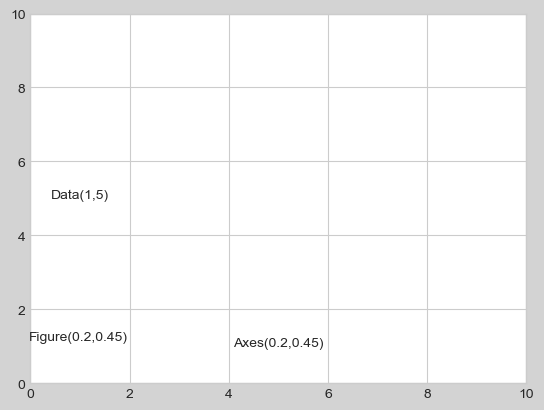

In [2]:
# 변환 및 텍스트 위치

fig,ax = plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

ax.text(1,5,'Data(1,5)',ha='center',transform=ax.transData)
ax.text(0.5,0.1,'Axes(0.2,0.45)',ha='center',transform=ax.transAxes)
ax.text(0.2,0.2,'Figure(0.2,0.45)',ha='center',transform=fig.transFigure)

(0.0, 10.0, 0.0, 10.0)

Text(1, 5, 'Data(1,5)')

Text(0.5, 0.1, 'Axes(0.2,0.45)')

Text(0.2, 0.2, 'Figure(0.2,0.45)')

[(0.0, 2.0), (-6.0, 6.0)]

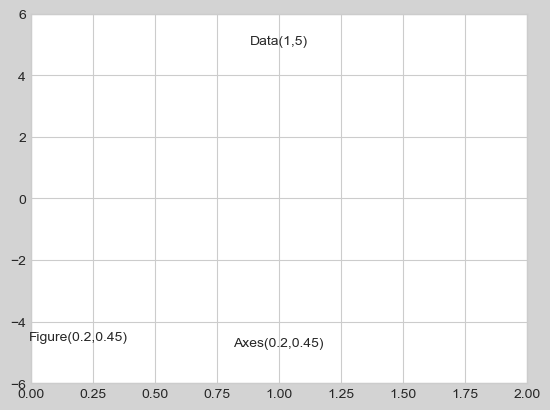

In [3]:
# axis 범위 변경하면 결국 data 좌표만 바뀌고 나머지는 그대로 있다
fig,ax = plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

ax.text(1,5,'Data(1,5)',ha='center',transform=ax.transData)
ax.text(0.5,0.1,'Axes(0.2,0.45)',ha='center',transform=ax.transAxes)
ax.text(0.2,0.2,'Figure(0.2,0.45)',ha='center',transform=fig.transFigure)
ax.set(xlim=(0,2),ylim=(-6,6)) 

### 그래프에 값 표시

Text(0.0, 18.5, '18.5')

Text(1.0, 13.3, '13.3')

Text(2.0, 12.5, '12.5')

Text(3.0, 14.2, '14.2')

<BarContainer object of 4 artists>

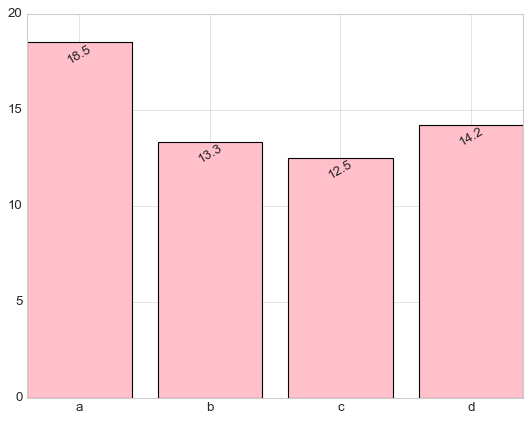

In [51]:
x = ['a', 'b', 'c', 'd']
y = [18.5, 13.3, 12.5, 14.2]
bar = plt.bar(x, y, color = 'pink')

# 숫자 넣는 부분
# x 받고 center만큼 이동
# va: vertical alligment
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='top', size = 12,rotation=30)
    


(0.0, 22.0)

Text(0, 18.75, '18.5')

Text(1, 13.55, '13.3')

Text(2, 12.75, '12.5')

Text(3, 14.45, '14.2')

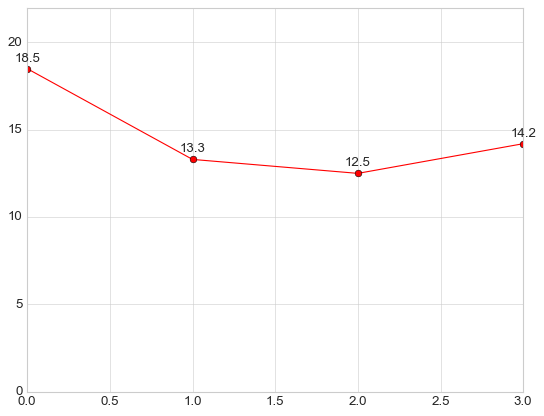

In [50]:
x = [0, 1, 2, 3]
y = [18.5, 13.3, 12.5, 14.2]
line_graph = plt.plot(x, y, 'o-', color = 'red')
plt.ylim(0, 22)

# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)

### tick 공유
- 아래 도큐멘트 참고
- 다른 ax를 지칭할수도 있다

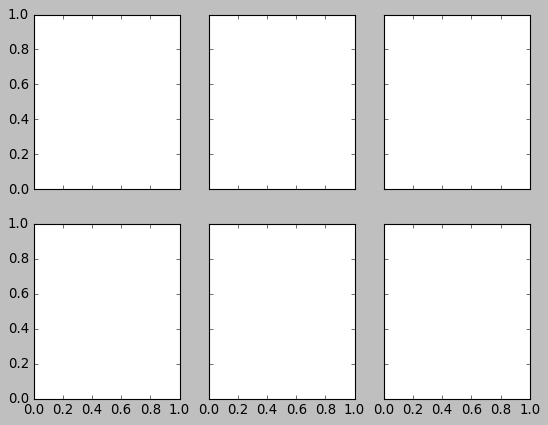

In [39]:
# sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
#     Controls sharing of properties among x (*sharex*) or y (*sharey*) axes:

# True or 'all': x- or y-axis will be shared among all subplots.
# False or 'none': each subplot x- or y-axis will be independent.
# 'row': each subplot row will share an x- or y-axis.
# 'col': each subplot column will share an x- or y-axis.

fig,ax = plt.subplots(2,3,sharex='col',sharey='row')

(array([  4.,  27., 156., 487., 892., 858., 425., 124.,  19.,   8.]),
 array([-3.9435462 , -3.15139565, -2.35924511, -1.56709457, -0.77494403,
         0.01720651,  0.80935706,  1.6015076 ,  2.39365814,  3.18580868,
         3.97795922]),
 <BarContainer object of 10 artists>)

(array([  2.,  37.,  96., 359., 699., 795., 606., 309.,  75.,  22.]),
 array([-5.24774175, -4.27783786, -3.30793398, -2.33803009, -1.36812621,
        -0.39822232,  0.57168156,  1.54158545,  2.51148933,  3.48139322,
         4.4512971 ]),
 <BarContainer object of 10 artists>)

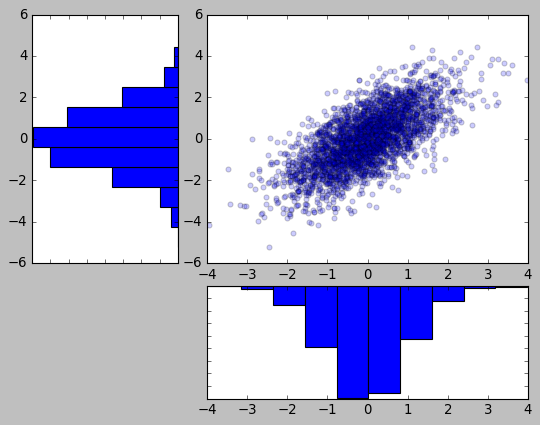

In [40]:
# ax 지칭해서 공유
mean = [0,0]
cov = [[1,1],[1,2]]

x,y = np.random.multivariate_normal(mean,cov,3000).T

fig = plt.figure()
grid = plt.GridSpec(3,3)
main_ax = fig.add_subplot(grid[0:2,1:3])
x_ax = fig.add_subplot(grid[2,1:],yticklabels=[],sharex=main_ax)
y_ax = fig.add_subplot(grid[0:2,0],xticklabels=[],sharey=main_ax)
main_ax.scatter(x,y,alpha=0.2)
x_ax.hist(x,orientation='vertical')
x_ax.invert_yaxis()

y_ax.hist(y,orientation='horizontal')
y_ax.invert_xaxis()

### ticks
<par> 가장 간단하게는 axes 요소인 xtick 혹은 yticks의 값들을 개별적으로 설정해서 조절가능하다. <br/>
tick과 label은 한쌍이라고 생각하자. tick이 위치이고 label이 위치에 해당하는 label이다. => axes 생성할때 혹은 후에 tickr값 조절해주면 된다

<par> 하지만 좌표계가 복잡해지면 일일히 지정해주기 어렵다. <br/>
생성된 축은 locator와 formatter로 이루어져있다. 이를 조정해서 tick을 변경할수도 있다

<par> 주 눈금과 보조눈금 존재 => 보조눈금 너무 신경쓰지 말자


[[]]

[]

[]

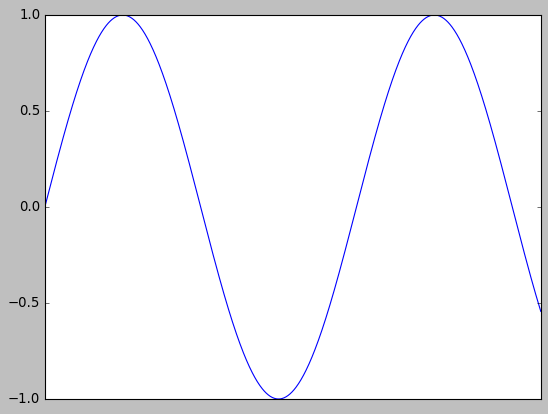

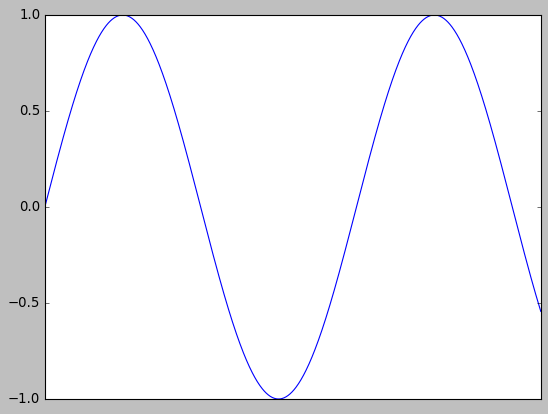

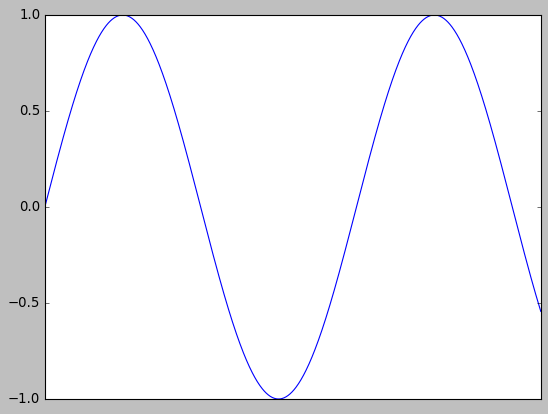

In [17]:
# 다 동일할수 밖에
x = np.linspace(0,10,1000)
fig = plt.figure()
ax = plt.axes()
ax.set(xticks=[],) # label을 바꿔주지 않아도 tick위치가 없어졌으므로 xtick아무것도 출력 x
ax.plot(x,np.sin(x))

x = np.linspace(0,10,1000)
fig = plt.figure()
ax = plt.axes(xticks=[])
ax.set()
ax.plot(x,np.sin(x))

x = np.linspace(0,10,1000)
fig = plt.figure()
ax = fig.add_subplot(xticks=[])
ax.set()
ax.plot(x,np.sin(x))

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x1783e9b20>,
 [Text(0, 0, '2018'), Text(1, 0, '2019'), Text(2, 0, '2020')])

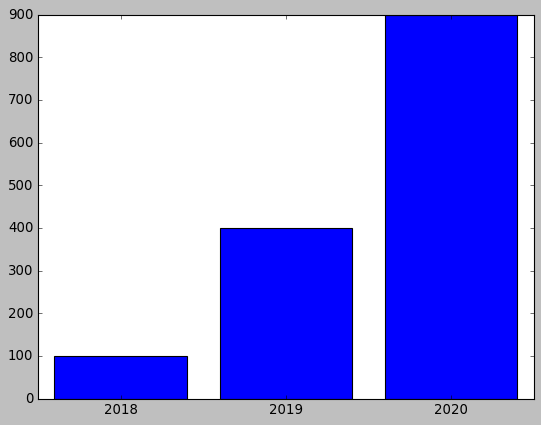

In [41]:
# plt.xtick()도 가능
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.bar(x, values) # loc, values
plt.xticks(x, years)
plt.show()

[[<matplotlib.axis.XTick at 0x14eac0be0>],
 [Text(3.141592653589793, 0, '$\\pi$')]]

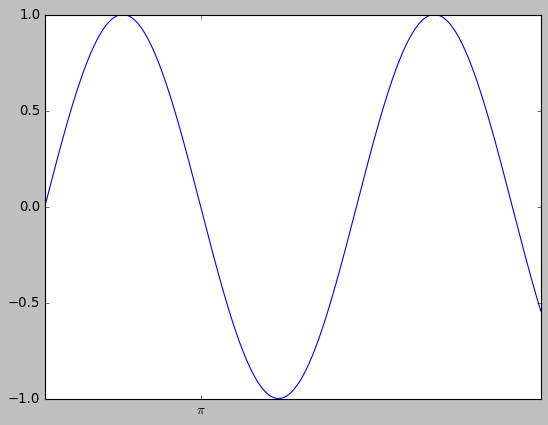

In [11]:
x = np.linspace(0,10,1000)
fig = plt.figure()
ax = plt.axes()
ax.set(xticks=[np.pi],xticklabels=['$\pi$'])
ax.plot(x,np.sin(x))

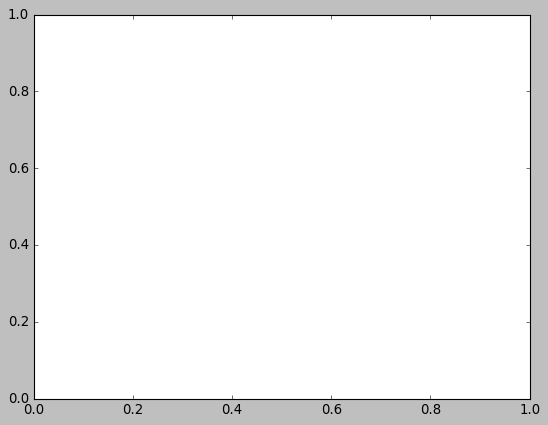

In [21]:
# 각 locator 혹은 formatter가 몬지 너무 깊게 이해할 필요 없다
# 우리가 필요한 것만 이해하면 된다
# 그냥 locator formatter로 구성된다만 이해하자
fig, ax = plt.subplots()
ax.xaxis.get_major_locator()
ax.xaxis.get_minor_locator()

ax.xaxis.get_major_formatter()
ax.xaxis.get_minor_formatter()

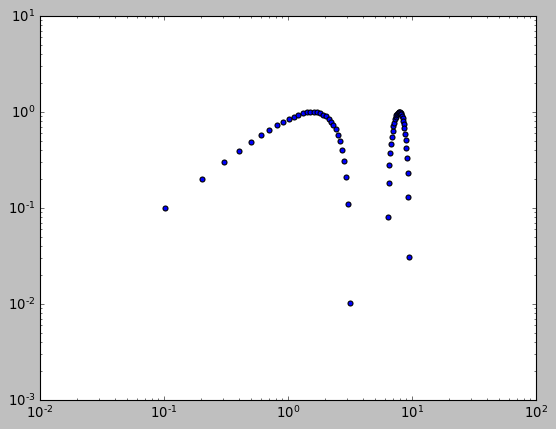

In [24]:
# 눈금 맞춤 변경하기
# 눈금 format을 log로 해보자
x = np.linspace(0,10,100)
plt.style.use('classic')
ax = plt.axes(xscale = 'log',yscale='log')
plt.scatter(x,np.sin(x))
plt.show()
ax.xaxis.major.formatter

# 출력에 logFormatter로 되어있는걸 확인 가능


###  formatter locator 연습

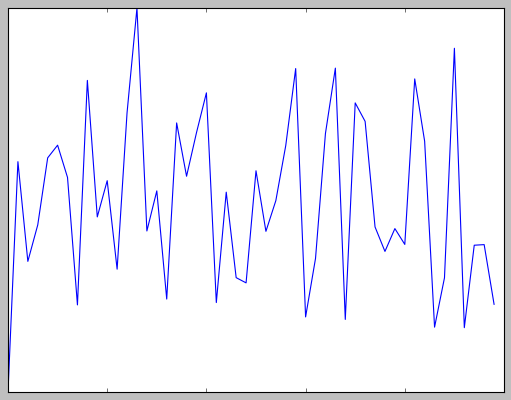

In [25]:
# formatter locater 연습

# 눈금 없애기
ax = plt.axes()
ax.plot(np.random.randn(50))

# formatter locator 별로 상관이 없다 여기서는 
# 한쪽만 null되도 출력되는게 없다
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

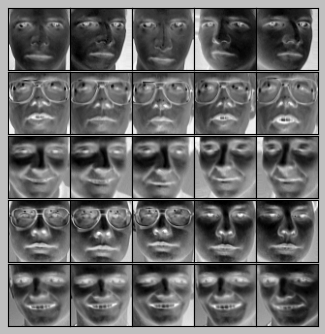

In [28]:
# image 불러 올때 눈금 없는게 아주 유용하다

fig,ax = plt.subplots(5,5,figsize=(5,5))
fig.subplots_adjust(hspace=0,wspace=0)
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].xaxis.set_major_locator(plt.NullLocator())
        image = ax[i,j].imshow(faces[10*i+j],cmap='binary')

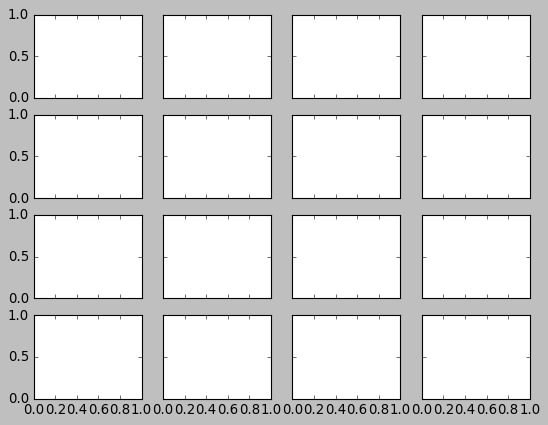

In [29]:
# 눈금 늘리기
#fig,ax = plt.subplots(4,4,sharex=True,sharey=True)
fig,ax = plt.subplots(4,4,sharex='col',sharey='row')
for axi in ax.flat:
    axi.yaxis.set_major_locator(plt.MaxNLocator(2))
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))

(0.0, 10.0, -1.0, 1.0)

(0.0, 9.42477796076938)

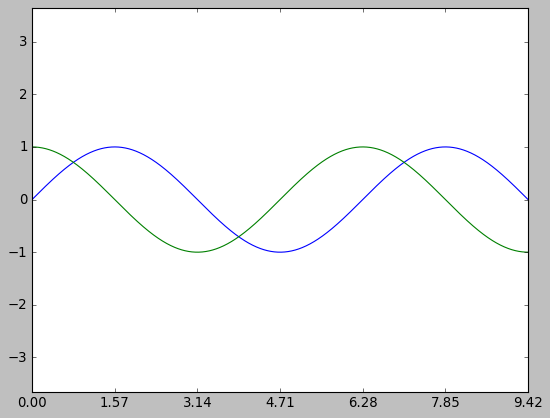

In [30]:
# multiple locator
fig, ax = plt.subplots()
x = np.linspace(0,3*np.pi,1000)
ax.plot(x,np.sin(x))
ax.plot(x,np.cos(x))
ax.axis('equal')
ax.set_xlim(0,3*np.pi)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))


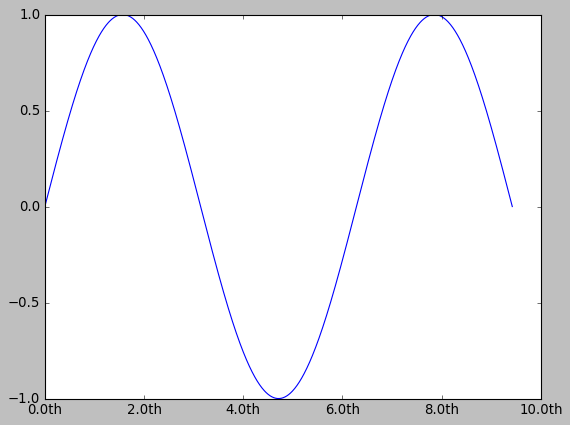

In [38]:
# fancy 눈금
# 사용자 지정 함수도 가능
# The function should take in two inputs (tick value x and position pos) and return a string
# value가 실제 값이고 pos가 순서다
def format_func(x,pos):
    return f'{x}th'

fig, ax = plt.subplots()
x = np.linspace(0,3*np.pi,1000)
ax.plot(x,np.sin(x))
ax.xaxis.set_major_formatter(format_func)


### 실습

In [56]:
births = pd.read_csv('data/births.csv')

In [57]:
births = births[births['day'].isna()==False]
births = births[births['day']!=99]

In [73]:
births_1988 = births[births['year']==1988].groupby(['month','day'])['births'].sum()
births_1988.index = [pd.datetime(1988,month,int(day)) for (month,day) in births_1988.index]
births_1988

/var/folders/v3/m9cgmw1d3qs7ppj4ltvx26pc0000gn/T/ipykernel_83377/839903004.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_1988.index = [pd.datetime(1988,month,int(day)) for (month,day) in births_1988.index]


1988-01-01     8494
1988-01-02     8049
1988-01-03     8177
1988-01-04    10202
1988-01-05    10927
              ...  
1988-12-27    11528
1988-12-28    11847
1988-12-29    11704
1988-12-30    11837
1988-12-31     9133
Name: births, Length: 366, dtype: int64

In [76]:
births_1988.index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1988-12-22', '1988-12-23', '1988-12-24', '1988-12-25',
               '1988-12-26', '1988-12-27', '1988-12-28', '1988-12-29',
               '1988-12-30', '1988-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)

In [75]:
births_1988['1988-01-01']

8494

In [82]:
pd.to_datetime('1988-01-01')

Timestamp('1988-01-01 00:00:00')

Text(1988-12-25 00:00:00, 7835, 'Christmas')

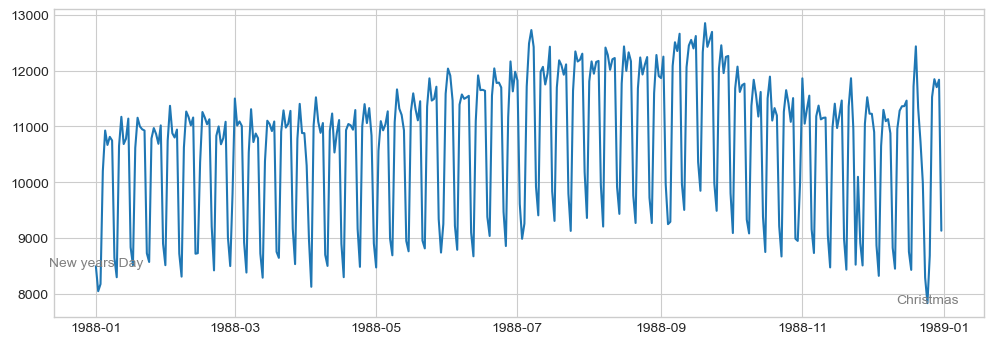

In [85]:
fig = plt.figure(figsize=(12,4))
ax = plt.axes()
ax.plot(births_1988.index,births_1988)

style = dict(size=10,color='gray',ha='center')

ax.text(pd.to_datetime('1988-01-01'),births_1988['1988-01-01'],'New years Day',style)
ax.text(pd.to_datetime('1988-12-25'),births_1988['1988-12-25'],'Christmas',style)


### datetime formatting


In [ ]:
# Below are the character codes to format the date and time:-

# %d: Returns the day of the month, from 1 to 31.
# %m: Returns the month of the year, from 1 to 12.
# %Y: Returns the year in four-digit format (Year with century). like, 2021.
# %y: Reurns year in two-digit format (year without century). like, 19, 20, 21
# %A: Returns the full name of the weekday. Like, Monday, Tuesday
# %a: Returns the short name of the weekday (First three character.). Like, Mon, Tue
# %B: Returns the full name of the month. Like, June, March
# %b: Returns the short name of the month (First three character.). Like, Mar, Jun
# %H: Returns the hour. from 01 to 23.
# %I: Returns the hour in 12-hours format. from 01 to 12.
# %M: Returns the minute, from 00 to 59.
# %S: Returns the second, from 00 to 59.
# %f: Return the microseconds from 000000 to 999999
# %p: Return time in AM/PM format
# %c: Returns a locale’s appropriate date and time representation
# %x: Returns a locale’s appropriate date representation
# %X: Returns a locale’s appropriate time representation
# %z: Return the UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).
# %Z: Return the Time zone name (empty string if the object is naive).
# %j: Returns the day of the year from 01 to 366
# %w: Returns weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
# %U: Returns the week number of the year (Sunday as the first day of the week) from 00 to 53
# %W: Returns the week number of the year (Monday as the first day of the week) from 00 to 53

/var/folders/v3/m9cgmw1d3qs7ppj4ltvx26pc0000gn/T/ipykernel_83377/3851970035.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax.plot([pd.datetime(1988,month,int(day)) for (month,day) in births_1988.index],births_1988)


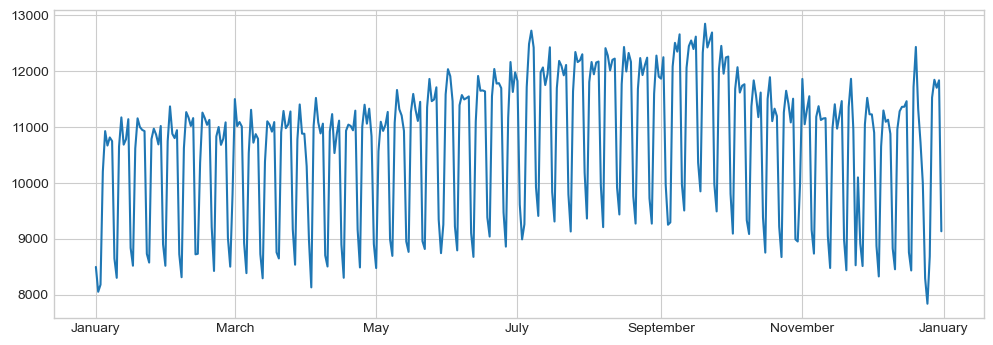

In [68]:
from matplotlib.dates import DateFormatter

myFmt = DateFormatter("%B")


fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
ax.plot([pd.datetime(1988,month,int(day)) for (month,day) in births_1988.index],births_1988)
ax.xaxis.set_major_formatter(myFmt)